**Author: Fitria Dwi Wulandari (wulan391@sci.ui.ac.id) - September, 2020.**

# Hoax Detection




**Project Backround**: This project was made as a report for a Big Data Challenge at Satria Data 2020 by IPB University.

**Goals**:
1. Identified the percentage of hoax and non-hoax articles.
2. Implemented machine learning algorithms to predict the truth of the articles that is hoax or non-hoax.

## Table of Content
The layout of this documentation is as follows:
1. Data Preparation
    - Import libraries
    - Import dataset
2. Data Cleaning
    - Data types information
    - Detecting missing values
    - Drop unnecessary columns
    - Text cleaning
        - Convert text into lower case
        - Remove special character (emoji, punctuation, numbers, etc)
        - Tokenization
        - Remove stop words
        - Lemmatization
3. Data Visualization
    - Percentage of hoax and non-hoax articles
    - Wordcloud of hoax articles
4. Data Modeling
    - Data splitting
    - Vectorization
    - Machine learning methods (logistic regression, decision tree, renadom forest, naive bayes, etc)
5. Model Selection
6. Prediction (on test dataset as unseen data)

### DATA PREPARATION

#### Import Libraries

In [577]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings # Ignores any warning
warnings.filterwarnings("ignore")

!pip install plotly
import plotly.express as px
from plotly import graph_objs as go

!pip install contractions
import contractions
!pip install tokenization
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('omw-1.4')
import re
import string

[nltk_data] Downloading package wordnet to C:\Users\USER
[nltk_data]     KEMENDIKBUD\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\USER
[nltk_data]     KEMENDIKBUD\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\USER
[nltk_data]     KEMENDIKBUD\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:\Users\USER
[nltk_data]     KEMENDIKBUD\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [578]:
pd.set_option('display.max_rows', None)

#### Import Dataset

In [579]:
# import train dataset
df_train = pd.read_csv('Satria Data - Data Latih.csv', sep=',')
print('This dataset has %d rows dan %d columns.\n' % df_train.shape)
df_train.head()

This dataset has 4231 rows dan 6 columns.



,ID,label,tanggal,judul,narasi,nama file gambar
0,71,1,17-Aug-20,Pemakaian Masker Menyebabkan Penyakit Legionna...,A caller to a radio talk show recently shared ...,71.jpg
1,461,1,17-Jul-20,Instruksi Gubernur Jateng tentang penilangan ...,Yth.Seluruh Anggota Grup Sesuai Instruksi Gube...,461.png
2,495,1,13-Jul-20,Foto Jim Rohn: Jokowi adalah presiden terbaik ...,Jokowi adalah presiden terbaik dlm sejarah ban...,495.png
3,550,1,8-Jul-20,"ini bukan politik, tapi kenyataan Pak Jokowi b...","Maaf Mas2 dan Mbak2, ini bukan politik, tapi k...",550.png
4,681,1,24-Jun-20,Foto Kadrun kalo lihat foto ini panas dingin,Kadrun kalo lihat foto ini panas dingin . .,681.jpg


In [580]:
# make a copy of train dataset
train = df_train.copy()

### DATA CLEANING

#### Data Types Information

In [581]:
# data types information of train dataset
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4231 entries, 0 to 4230
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                4231 non-null   int64 
 1   label             4231 non-null   int64 
 2   tanggal           4231 non-null   object
 3   judul             4231 non-null   object
 4   narasi            4231 non-null   object
 5   nama file gambar  4231 non-null   object
dtypes: int64(2), object(4)
memory usage: 198.5+ KB


#### Detecting Missing Values

In [582]:
# missing values in train data
print('Missing values status:', df_train.isnull().values.any())
print('\nThe number of missing values for each columns:')
print(df_train.isnull().sum().sort_values(ascending=False))

Missing values status: False

The number of missing values for each columns:
ID                  0
label               0
tanggal             0
judul               0
narasi              0
nama file gambar    0
dtype: int64


#### Drop Unnecessary Columns

In [583]:
# columns in train dataset
df_train.columns

Index(['ID', 'label', 'tanggal', 'judul', 'narasi', 'nama file gambar'], dtype='object')

In [584]:
# drop unnecessary columns
df_train.drop(columns=['ID', 'tanggal', 'nama file gambar'], axis=1, inplace=True)

In [585]:
# train dataset after unnecessary columns dropped
df_train.head()

,label,judul,narasi
0,1,Pemakaian Masker Menyebabkan Penyakit Legionna...,A caller to a radio talk show recently shared ...
1,1,Instruksi Gubernur Jateng tentang penilangan ...,Yth.Seluruh Anggota Grup Sesuai Instruksi Gube...
2,1,Foto Jim Rohn: Jokowi adalah presiden terbaik ...,Jokowi adalah presiden terbaik dlm sejarah ban...
3,1,"ini bukan politik, tapi kenyataan Pak Jokowi b...","Maaf Mas2 dan Mbak2, ini bukan politik, tapi k..."
4,1,Foto Kadrun kalo lihat foto ini panas dingin,Kadrun kalo lihat foto ini panas dingin . .


#### Text Cleaning

In summary, I want to clean up text data by converting all characters to lowercase, removing brackets, URLs, html tags, punctuation, numbers, etc. I will also remove the emoji from the text and remove the common stopword.

#### Convert Text into Lower Case

In [586]:
# make text into lower case
df_train['judul']  = df_train['judul'].str.lower()
df_train['narasi']  = df_train['narasi'].str.lower()

# let's see the difference
print('Original Text:\n' , train.narasi[1399])
print('\nAfter Removal:\n',df_train.narasi[1399])

Original Text:
 Terjadi lagi pembunuhan terhadap Muadzin…..
 Inalillahi…
 Almarhum Bapak Bahron, Dibunuh pada tanggal 15/02/2018, di desa sindang, kec cikijing majalengka.
 semoga almarhum Husnul khotimah….
 Bukti nyata bahwa pemerintah saat ini gagal Total menjaga keamanan dan stabilitas Negara.
 Masih mau 2 priode.
 #ngimpi

After Removal:
 terjadi lagi pembunuhan terhadap muadzin…..
 inalillahi…
 almarhum bapak bahron, dibunuh pada tanggal 15/02/2018, di desa sindang, kec cikijing majalengka.
 semoga almarhum husnul khotimah….
 bukti nyata bahwa pemerintah saat ini gagal total menjaga keamanan dan stabilitas negara.
 masih mau 2 priode.
 #ngimpi


#### Remove Special Character

In [587]:
# remove emoji
df_train['judul'] = df_train['judul'].str.replace('[^\w\s#@/:%.,_-]', '', flags=re.UNICODE)
df_train['narasi'] = df_train['narasi'].str.replace('[^\w\s#@/:%.,_-]', '', flags=re.UNICODE)

# let's see the difference
print('Original Text:\n' , train.narasi[0])
print('\nAfter Removal:\n',df_train.narasi[0])

Original Text:
 A caller to a radio talk show recently shared that his wife was hospitalized n told she had COVID n only a couple of days left to live . A doctor friend suggested she be tested for legionnaires disease because she wore the same mask every day all day long . Turns out it WAS legionnaires disease from the moisture n bacteria in her mask . She was given antibiotics n within two days was better . WHAT IF these ‘spikes’ in COVID are really something else due to ‘mask induced infections’ .??🤔🤔🤔

After Removal:
 a caller to a radio talk show recently shared that his wife was hospitalized n told she had covid n only a couple of days left to live . a doctor friend suggested she be tested for legionnaires disease because she wore the same mask every day all day long . turns out it was legionnaires disease from the moisture n bacteria in her mask . she was given antibiotics n within two days was better . what if these spikes in covid are really something else due to mask induced i

In [588]:
# remove numbers
df_train['judul'] = df_train['judul'].str.replace('\d+', '')
df_train['narasi'] = df_train['narasi'].str.replace('\d+', '')

# let's see the difference
print('Original Text:\n' , train.narasi[1399])
print('\nAfter Removal:\n',df_train.narasi[1399])

Original Text:
 Terjadi lagi pembunuhan terhadap Muadzin…..
 Inalillahi…
 Almarhum Bapak Bahron, Dibunuh pada tanggal 15/02/2018, di desa sindang, kec cikijing majalengka.
 semoga almarhum Husnul khotimah….
 Bukti nyata bahwa pemerintah saat ini gagal Total menjaga keamanan dan stabilitas Negara.
 Masih mau 2 priode.
 #ngimpi

After Removal:
 terjadi lagi pembunuhan terhadap muadzin..
 inalillahi
 almarhum bapak bahron, dibunuh pada tanggal //, di desa sindang, kec cikijing majalengka.
 semoga almarhum husnul khotimah.
 bukti nyata bahwa pemerintah saat ini gagal total menjaga keamanan dan stabilitas negara.
 masih mau  priode.
 #ngimpi


In [589]:
# remove punctuation
df_train['judul'] = df_train['judul'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ' , x))
df_train['narasi'] = df_train['narasi'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ' , x))

# let's see the difference
print('Original Text:\n' , train.narasi[1399])
print('\nAfter Removal:\n',df_train.narasi[1399])

Original Text:
 Terjadi lagi pembunuhan terhadap Muadzin…..
 Inalillahi…
 Almarhum Bapak Bahron, Dibunuh pada tanggal 15/02/2018, di desa sindang, kec cikijing majalengka.
 semoga almarhum Husnul khotimah….
 Bukti nyata bahwa pemerintah saat ini gagal Total menjaga keamanan dan stabilitas Negara.
 Masih mau 2 priode.
 #ngimpi

After Removal:
 terjadi lagi pembunuhan terhadap muadzin  
 inalillahi
 almarhum bapak bahron  dibunuh pada tanggal     di desa sindang  kec cikijing majalengka 
 semoga almarhum husnul khotimah 
 bukti nyata bahwa pemerintah saat ini gagal total menjaga keamanan dan stabilitas negara 
 masih mau  priode 
  ngimpi


In [590]:
# contractions
df_train['judul'] = df_train['judul'].apply(lambda x: contractions.fix(x))
df_train['narasi'] = df_train['narasi'].apply(lambda x: contractions.fix(x))

# let's see the difference
print('Original Text:\n' , train.narasi[0])
print('\nAfter Removal:\n',df_train.narasi[0])

Original Text:
 A caller to a radio talk show recently shared that his wife was hospitalized n told she had COVID n only a couple of days left to live . A doctor friend suggested she be tested for legionnaires disease because she wore the same mask every day all day long . Turns out it WAS legionnaires disease from the moisture n bacteria in her mask . She was given antibiotics n within two days was better . WHAT IF these ‘spikes’ in COVID are really something else due to ‘mask induced infections’ .??🤔🤔🤔

After Removal:
 a caller to a radio talk show recently shared that his wife was hospitalized n told she had covid n only a couple of days left to live   a doctor friend suggested she be tested for legionnaires disease because she wore the same mask every day all day long   turns out it was legionnaires disease from the moisture n bacteria in her mask   she was given antibiotics n within two days was better   what if these spikes in covid are really something else due to mask induced i

In [591]:
# remove repeated char
df_train['judul'] = df_train['judul'].str.replace(r'(\w)\1{2,}', r'\1')
df_train['narasi'] = df_train['narasi'].str.replace(r'(\w)\1{2,}', r'\1')

# let's see the difference
print('Original Text:\n' , train.narasi[1399])
print('\nAfter Removal:\n',df_train.narasi[1399])

Original Text:
 Terjadi lagi pembunuhan terhadap Muadzin…..
 Inalillahi…
 Almarhum Bapak Bahron, Dibunuh pada tanggal 15/02/2018, di desa sindang, kec cikijing majalengka.
 semoga almarhum Husnul khotimah….
 Bukti nyata bahwa pemerintah saat ini gagal Total menjaga keamanan dan stabilitas Negara.
 Masih mau 2 priode.
 #ngimpi

After Removal:
 terjadi lagi pembunuhan terhadap muadzin  
 inalillahi
 almarhum bapak bahron  dibunuh pada tanggal     di desa sindang  kec cikijing majalengka 
 semoga almarhum husnul khotimah 
 bukti nyata bahwa pemerintah saat ini gagal total menjaga keamanan dan stabilitas negara 
 masih mau  priode 
  ngimpi


In [592]:
# remove triple dot
df_train['judul'] = df_train['judul'].str.replace('[‘’“”…]', '')
df_train['narasi'] = df_train['narasi'].str.replace('[‘’“”…]', '')

# let's see the difference
print('Original Text:\n' , train.narasi[1399])
print('\nAfter Removal:\n',df_train.narasi[1399])

Original Text:
 Terjadi lagi pembunuhan terhadap Muadzin…..
 Inalillahi…
 Almarhum Bapak Bahron, Dibunuh pada tanggal 15/02/2018, di desa sindang, kec cikijing majalengka.
 semoga almarhum Husnul khotimah….
 Bukti nyata bahwa pemerintah saat ini gagal Total menjaga keamanan dan stabilitas Negara.
 Masih mau 2 priode.
 #ngimpi

After Removal:
 terjadi lagi pembunuhan terhadap muadzin  
 inalillahi
 almarhum bapak bahron  dibunuh pada tanggal     di desa sindang  kec cikijing majalengka 
 semoga almarhum husnul khotimah 
 bukti nyata bahwa pemerintah saat ini gagal total menjaga keamanan dan stabilitas negara 
 masih mau  priode 
  ngimpi


In [593]:
# remove word containing number
df_train['judul'] = df_train['judul'].str.replace('\w*\d\w*', '')
df_train['narasi'] = df_train['narasi'].str.replace('\w*\d\w*', '')

# remove html markup
df_train['judul'] = df_train['judul'].str.replace('(<.*?>)', '')
df_train['narasi'] = df_train['narasi'].str.replace('(<.*?>)', '')

# remove url
df_train['judul'] = df_train['judul'].str.replace('https?://\S+|www\.\S+', '')
df_train['narasi'] = df_train['narasi'].str.replace('https?://\S+|www\.\S+', '')

# remove html
df_train['judul'] = df_train['judul'].replace(to_replace=r'^https?:\/\/.*[\r\n]*',value='',regex=True)
df_train['narasi'] = df_train['narasi'].replace(to_replace=r'^https?:\/\/.*[\r\n]*',value='',regex=True)

# remove extra space
df_train['judul'] = df_train['judul'].str.replace(' +', ' ')
df_train['narasi'] = df_train['narasi'].str.replace(' +', ' ')

In [594]:
# let's see the difference
print('Original Text:\n' , train.narasi[17])
print('\nAfter Removal:\n',df_train.narasi[17])

Original Text:
 INFORMASI RESMI DARI DEPNAKER REPUBLIK INDONESIA !!!!!
 Selamat Anda Terpilih Mendapatkan PENGHARGAAN sebesar NT $. 350.000 dari DEPARTEMEN KETENAGA KERJAAN INDONESIA. Sebagai Pahlawan Devisa Negara terbaik Tahun 2017-2018. Kode registrasi TWN37589
 Hubungi Call office:
 +62853-9313-1245
 A/n HARYONO
 Atau kunjungi Alamat Website:
 www.DEPNAKER.yolasite.com
 1. Bagi anda penerimah pemberitahuan ini melalui Telephone atau Sms Whatsapp. Berarti telah resmi mendapatkan penghargaan tersebut tanpa diundi lagi.
 2. Penghargaan Depnaker Bebas Biaya dan telah mendapat sertifikat Bebas pajak dari pemerintah Republik Indonesia.
 3. Pengurusan Penghargaan telah mendapat Pengawasan dari Kepolisian Negara Republik Indonesia dumaksudkan untuk menghindari hal-hal Negatif.
 Peringatan:
 HATI HATI PENIPUAN BILA DALAM PENGURUSAN ANDA DIMINTAI BIAYA, DARI OKNUM OKNUM YANG TIDAK BERTANGGUNH JAWAB. TANPA SEPENGETAHUAN DARI PIHAK DEPNAKER RI.
 pengirim:
 Depnaker Ri.
 73538373777

After Remo

#### Tokenization

In [595]:
df_train['judul'] = df_train.apply(lambda row: nltk.word_tokenize(row['judul']), axis=1)
df_train['narasi'] = df_train.apply(lambda row: nltk.word_tokenize(row['narasi']), axis=1)

In [596]:
# let's see the difference
print('Original Text:\n' , train.narasi[1399])
print('\nAfter Tokenization:\n',df_train.narasi[1399])

Original Text:
 Terjadi lagi pembunuhan terhadap Muadzin…..
 Inalillahi…
 Almarhum Bapak Bahron, Dibunuh pada tanggal 15/02/2018, di desa sindang, kec cikijing majalengka.
 semoga almarhum Husnul khotimah….
 Bukti nyata bahwa pemerintah saat ini gagal Total menjaga keamanan dan stabilitas Negara.
 Masih mau 2 priode.
 #ngimpi

After Tokenization:
 ['terjadi', 'lagi', 'pembunuhan', 'terhadap', 'muadzin', 'inalillahi', 'almarhum', 'bapak', 'bahron', 'dibunuh', 'pada', 'tanggal', 'di', 'desa', 'sindang', 'kec', 'cikijing', 'majalengka', 'semoga', 'almarhum', 'husnul', 'khotimah', 'bukti', 'nyata', 'bahwa', 'pemerintah', 'saat', 'ini', 'gagal', 'total', 'menjaga', 'keamanan', 'dan', 'stabilitas', 'negara', 'masih', 'mau', 'priode', 'ngimpi']


#### Stopword

In [597]:
# stopword for indonesia
!pip install sastrawi
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

In [598]:
factory = StopWordRemoverFactory()
stop_ind = factory.get_stop_words()
stop_ind.append('yg')
stop_ind.append('dengan')
stop_ind.append('ia')
stop_ind.append('bahwa')
stop_ind.append('oleh')
stop_ind.append('jadi')
stop_ind.append('yth')
stop_ind.append('nya')
stop_ind.append('dengan')
stop_ind.append('dgn')
stop_ind.append('dlm')
stop_ind.append('indonesia')
stop_ind.append('orang')
stop_ind.append('tersebut')
stop_ind.append('semua')
stop_ind.append('utk')
stop_ind.append('sdh')
stop_ind.append('aja')
stop_ind.append('gak')
stop_ind.append('tdk')
stop_ind.append('kalau')
print(stop_ind)

['yang', 'untuk', 'pada', 'ke', 'para', 'namun', 'menurut', 'antara', 'dia', 'dua', 'ia', 'seperti', 'jika', 'jika', 'sehingga', 'kembali', 'dan', 'tidak', 'ini', 'karena', 'kepada', 'oleh', 'saat', 'harus', 'sementara', 'setelah', 'belum', 'kami', 'sekitar', 'bagi', 'serta', 'di', 'dari', 'telah', 'sebagai', 'masih', 'hal', 'ketika', 'adalah', 'itu', 'dalam', 'bisa', 'bahwa', 'atau', 'hanya', 'kita', 'dengan', 'akan', 'juga', 'ada', 'mereka', 'sudah', 'saya', 'terhadap', 'secara', 'agar', 'lain', 'anda', 'begitu', 'mengapa', 'kenapa', 'yaitu', 'yakni', 'daripada', 'itulah', 'lagi', 'maka', 'tentang', 'demi', 'dimana', 'kemana', 'pula', 'sambil', 'sebelum', 'sesudah', 'supaya', 'guna', 'kah', 'pun', 'sampai', 'sedangkan', 'selagi', 'sementara', 'tetapi', 'apakah', 'kecuali', 'sebab', 'selain', 'seolah', 'seraya', 'seterusnya', 'tanpa', 'agak', 'boleh', 'dapat', 'dsb', 'dst', 'dll', 'dahulu', 'dulunya', 'anu', 'demikian', 'tapi', 'ingin', 'juga', 'nggak', 'mari', 'nanti', 'melainkan', '

In [599]:
def remove_stopword_ind(x):
  clean = [word for word in x if word not in stop_ind]
  return clean

df_train['judul'] = df_train['judul'].apply(remove_stopword_ind)
df_train['narasi'] = df_train['narasi'].apply(remove_stopword_ind)

In [600]:
# let's see the difference
print('Original Text:\n' , train.narasi[1399])
print('\nAfter Stopword Removal (Indonesia):\n',df_train.narasi[1399])

Original Text:
 Terjadi lagi pembunuhan terhadap Muadzin…..
 Inalillahi…
 Almarhum Bapak Bahron, Dibunuh pada tanggal 15/02/2018, di desa sindang, kec cikijing majalengka.
 semoga almarhum Husnul khotimah….
 Bukti nyata bahwa pemerintah saat ini gagal Total menjaga keamanan dan stabilitas Negara.
 Masih mau 2 priode.
 #ngimpi

After Stopword Removal (Indonesia):
 ['terjadi', 'pembunuhan', 'muadzin', 'inalillahi', 'almarhum', 'bapak', 'bahron', 'dibunuh', 'tanggal', 'desa', 'sindang', 'kec', 'cikijing', 'majalengka', 'semoga', 'almarhum', 'husnul', 'khotimah', 'bukti', 'nyata', 'pemerintah', 'gagal', 'total', 'menjaga', 'keamanan', 'stabilitas', 'negara', 'mau', 'priode', 'ngimpi']


In [601]:
# stopword for english
stop_eng = stopwords.words("english")

In [602]:
# remove stopword (for english)
def remove_stopword(text):
  text = ' '.join([string for string in text if string not in stopwords.words('english')]) 
  return text

df_train['judul'] = df_train['judul'].apply(remove_stopword)
df_train['narasi'] = df_train['narasi'].apply(remove_stopword)

In [603]:
# let's see the difference
print('Original Text:\n' , train.narasi[0])
print('\nAfter Stopword Removal (English):\n',df_train.narasi[0])

Original Text:
 A caller to a radio talk show recently shared that his wife was hospitalized n told she had COVID n only a couple of days left to live . A doctor friend suggested she be tested for legionnaires disease because she wore the same mask every day all day long . Turns out it WAS legionnaires disease from the moisture n bacteria in her mask . She was given antibiotics n within two days was better . WHAT IF these ‘spikes’ in COVID are really something else due to ‘mask induced infections’ .??🤔🤔🤔

After Stopword Removal (English):
 caller radio talk show recently shared wife hospitalized n told covid n couple days left live doctor friend suggested tested legionnaires disease wore mask every day day long turns legionnaires disease moisture n bacteria mask given antibiotics n within two days better spikes covid really something else due mask induced infections


#### Lematization

In [604]:
# lematization
from nltk.stem.wordnet import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
  
def lematization(text):
  text = " ".join([lemmatizer.lemmatize(i) for i in text.split()])
  return text

In [605]:
df_train['judul'] = df_train['judul'].apply(lematization)
df_train['narasi'] = df_train['narasi'].apply(lematization)

In [606]:
# let's see the difference
print('Original Text:\n' , train.narasi[1])
print('\nAfter Lemmatization:\n',df_train.narasi[1])

Original Text:
 Yth.Seluruh Anggota Grup Sesuai Instruksi Gubernur Jawa Tengah Hasil Rapat Tim Gugus Tugas Covid 19 Jateng sbb:

After Lemmatization:
 seluruh anggota grup sesuai instruksi gubernur jawa tengah hasil rapat tim gugus tugas covid jateng sbb


### DATA VISUALIZATION

In [607]:
decode_map = {0: "Non Hoax", 1: "Hoax"}
def decode_sentiment(label):
    return decode_map[int(label)]

train['label'] = train['label'].apply(lambda x: decode_sentiment(x))

In [608]:
temp = train.groupby('label').count()['narasi'].sort_values(ascending=False)
temp.reset_index()

,label,narasi
0,Hoax,3465
1,Non Hoax,766


In [609]:
fig = px.bar(temp, x = temp.index, 
                   y = temp.values, 
                   color=temp.index,
                   color_discrete_map={"Hoax" : "#D62728",
                                      "Non Hoax" : "#00CC96"},
                   title = 'The Number of Hoax and Non-Hoax Articles',
                   labels = dict(y ="Count"))
fig.show()

In [610]:
fig2 = px.pie(temp, values=temp.values, names=temp.index,
              color=temp.index,
              color_discrete_map={"Hoax" : "#D62728",
                                      "Non Hoax" : "#00CC96"},
             title = 'The Percentage of Hoax and Non-Hoax Articles')
fig2.show()

In [611]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=1, cols=2, specs=[[{"type": "bar"}, {"type": "domain"}]])

fig.add_trace(
    go.Bar(x=temp.index, y=temp.values, marker=
           dict(color=["#D62728", "#00CC96"]), showlegend=False),
    row=1, col=1
)

fig.add_trace(
    go.Pie(labels=temp.index, values=temp.values, marker_colors=["#D62728", "#00CC96"]),
           row=1, col=2
)

fig.update_layout(height=600, width=800, title_text="Percentage of Hoax and Non-Hoax Articles")
fig.show()

In [612]:
!pip install wordcloud

In [613]:
# only hoax data
df_hoax = df_train[df_train["label"] == 1]

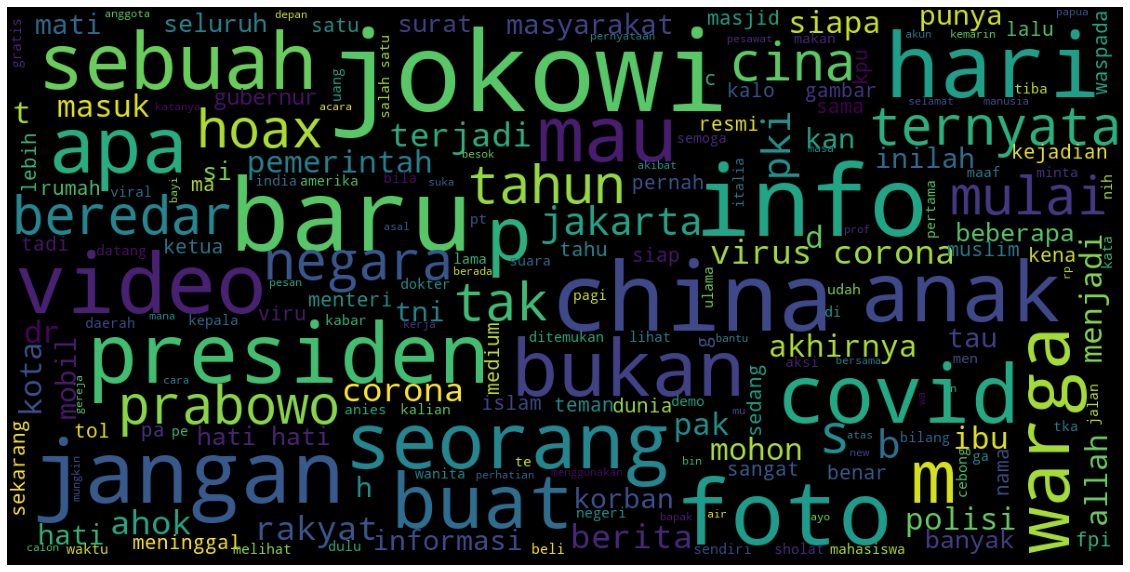

In [614]:
# wordcloud function
import wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color = 'black',
        max_words = 200,
        max_font_size = 40, 
        scale = 3,
        random_state = 42
    ).generate(str(data))

    fig = plt.figure(1, figsize = (20, 20))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show()
    
# print wordcloud
show_wordcloud(df_hoax['narasi'])

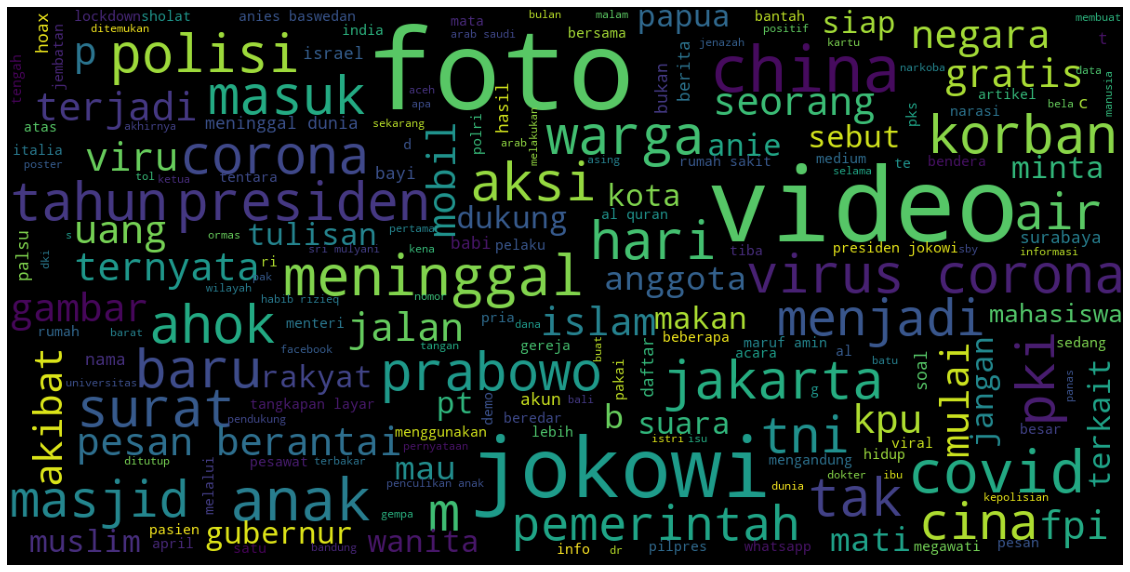

In [615]:
# print wordcloud
show_wordcloud(df_hoax['judul'])

### DATA MODELING

#### Data Splitting

In [616]:
# define x and y
x = df_train['narasi']
y = df_train['label']

In [617]:
# split x and y into the train and test sets
from sklearn.model_selection import train_test_split

# test data are 30% of the total data entry and the rest should be train data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [618]:
print('The number of rows and columns of x_train is:', x_train.shape,'and the number of rows and columns of y_train is:', y_train.shape)
print('\nHoax percentage in training data is:')
print(y_train.value_counts(normalize=True))

print('\n The number of rows and columns of x_test is:', x_test.shape,'and the number of rows and columns of y_test is:', y_test.shape)
print('\n Hoax percentage in testing data is:')
print(y_test.value_counts(normalize=True))

The number of rows and columns of x_train is: (2961, 14276) and the number of rows and columns of y_train is: (2961,)

Hoax percentage in training data is:
1    0.821006
0    0.178994
Name: label, dtype: float64

 The number of rows and columns of x_test is: (1270, 14276) and the number of rows and columns of y_test is: (1270,)

 Hoax percentage in testing data is:
1    0.814173
0    0.185827
Name: label, dtype: float64


#### Vectorization

In [619]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorization = TfidfVectorizer()
X_train = vectorization.fit_transform(X_train)
X_test = vectorization.transform(X_test)

#### Machine Learning Methods

Here are some algorithms that will be tested to determine the best model to predict the truth of the articles:
1. Logistic Regression
2. Decision Tree
3. Random Forest
4. Gaussian Naive Bayes
5. Neural Network
6. K-Nearest Neighbor
7. Support Vector Machine

#### 1. Logistic Regression Algorithm

In [620]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression().fit(X_train, y_train)

##### Performance of Training Set

Classification Report for Training Set (Logistic Regression Algorithm): 

              precision    recall  f1-score   support

           0       0.95      0.07      0.13       530
           1       0.83      1.00      0.91      2431

    accuracy                           0.83      2961
   macro avg       0.89      0.53      0.52      2961
weighted avg       0.85      0.83      0.77      2961



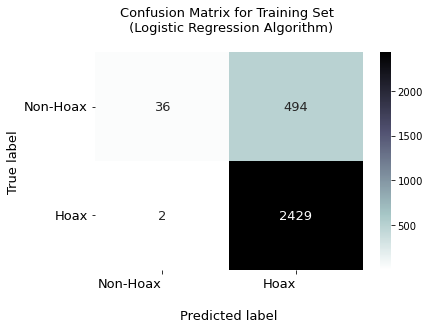

In [621]:
from sklearn.metrics import confusion_matrix, classification_report

# predict
train_pred_log = log_model.predict(X_train)

# classification report
print('Classification Report for Training Set (Logistic Regression Algorithm): \n')
print(classification_report(y_train, train_pred_log))

# plot confusion matrix
confusion_matrix_log = pd.DataFrame((confusion_matrix(y_train, train_pred_log)), ('Non-Hoax', 'Hoax'), ('Non-Hoax', 'Hoax'))

plt.figure()
heatmap = sns.heatmap(confusion_matrix_log, annot=True, annot_kws={'size': 13}, fmt='d', cmap='bone_r')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=13)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=13)

plt.title('Confusion Matrix for Training Set \n (Logistic Regression Algorithm)\n', fontsize=13, color='black')
plt.ylabel('True label', fontsize=13)
plt.xlabel('\nPredicted label', fontsize=13)
plt.show()

##### Performance of Testing Set

Classification Report for Testing Set (Logistic Regression Algorithm): 

              precision    recall  f1-score   support

           0       0.62      0.04      0.08       236
           1       0.82      0.99      0.90      1034

    accuracy                           0.82      1270
   macro avg       0.72      0.52      0.49      1270
weighted avg       0.78      0.82      0.75      1270



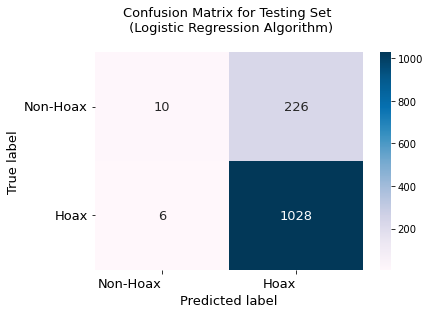

In [622]:
# predict
test_pred_log = log_model.predict(X_test)

# print classification report
print('Classification Report for Testing Set (Logistic Regression Algorithm): \n')
print(classification_report(y_test, test_pred_log))

# plot confusion matrix
confusion_matrix_log = pd.DataFrame((confusion_matrix(y_test, test_pred_log)), ('Non-Hoax', 'Hoax'), ('Non-Hoax', 'Hoax'))

plt.figure()
heatmap = sns.heatmap(confusion_matrix_log, annot=True, annot_kws={'size': 13}, fmt='d', cmap='PuBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=13)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=13)

plt.title('Confusion Matrix for Testing Set \n (Logistic Regression Algorithm)\n', fontsize=13, color='black')
plt.ylabel('True label', fontsize=13)
plt.xlabel('Predicted label', fontsize=13)
plt.show()

In [623]:
from sklearn.metrics import f1_score
f1_log_model_train = round(f1_score(y_train, train_pred_log)*100,2)
f1_log_model_test = round(f1_score(y_test, test_pred_log)*100,2)
print("F1-score on Training Set: {} %".format(f1_log_model_train))
print("F1-score on Testing Set: {} %".format(f1_log_model_test))

F1-score on Training Set: 90.74 %
F1-score on Testing Set: 89.86 %


#### 2. Decision Tree Algorithm

In [624]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier().fit(X_train, y_train)

##### Performance of Training Set

Classification Report for Training Set (Decision Tree Algorithm): 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       530
           1       1.00      1.00      1.00      2431

    accuracy                           1.00      2961
   macro avg       1.00      1.00      1.00      2961
weighted avg       1.00      1.00      1.00      2961



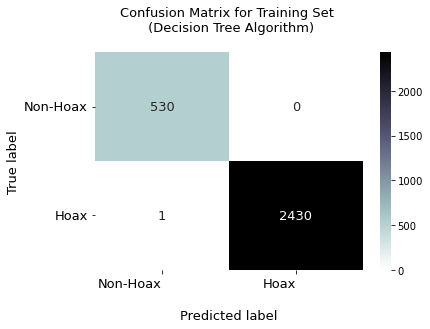

In [625]:
# predict
train_pred_dt = dt_model.predict(X_train)

# print classification report
print('Classification Report for Training Set (Decision Tree Algorithm): \n')
print(classification_report(y_train, train_pred_dt))

# plot confusion matrix
confusion_matrix_dt = pd.DataFrame((confusion_matrix(y_train, train_pred_dt)), ('Non-Hoax', 'Hoax'), ('Non-Hoax', 'Hoax'))

plt.figure()
heatmap = sns.heatmap(confusion_matrix_dt, annot=True, annot_kws={'size': 13}, fmt='d', cmap='bone_r')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=13)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=13)

plt.title('Confusion Matrix for Training Set \n (Decision Tree Algorithm)\n', fontsize=13, color='black')
plt.ylabel('True label', fontsize=13)
plt.xlabel('\nPredicted label', fontsize=13)
plt.show()

##### Performance of Testing Set

Classification Report for Testing Set (Decision Tree Algorithm): 

              precision    recall  f1-score   support

           0       0.36      0.34      0.35       236
           1       0.85      0.86      0.86      1034

    accuracy                           0.76      1270
   macro avg       0.61      0.60      0.60      1270
weighted avg       0.76      0.76      0.76      1270



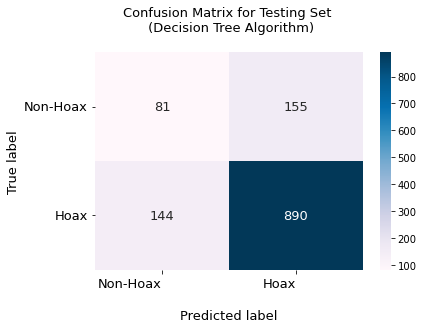

In [626]:
# predict
test_pred_dt = dt_model.predict(X_test)

# print classification report
print('Classification Report for Testing Set (Decision Tree Algorithm): \n')
print(classification_report(y_test, test_pred_dt))

# plot confusion matrix
confusion_matrix_dt = pd.DataFrame((confusion_matrix(y_test, test_pred_dt)), ('Non-Hoax', 'Hoax'), ('Non-Hoax', 'Hoax'))

plt.figure()
heatmap = sns.heatmap(confusion_matrix_dt, annot=True, annot_kws={'size': 13}, fmt='d', cmap='PuBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=13)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=13)

plt.title('Confusion Matrix for Testing Set \n (Decision Tree Algorithm)\n', fontsize=13, color='black')
plt.ylabel('True label', fontsize=13)
plt.xlabel('\nPredicted label', fontsize=13)
plt.show()

In [627]:
f1_dt_model_train = round(f1_score(y_train, train_pred_dt)*100,2)
f1_dt_model_test = round(f1_score(y_test, test_pred_dt)*100,2)
print("F1-score on Training Set: {} %".format(f1_dt_model_train))
print("F1-score on Testing Set: {} %".format(f1_dt_model_test))

F1-score on Training Set: 99.98 %
F1-score on Testing Set: 85.62 %


#### 3. Random Forest Algorithm

In [628]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier().fit(X_train, y_train)

##### Performance of Training Set

Classification Report for Training Set (Random Forest Algorithm): 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       530
           1       1.00      1.00      1.00      2431

    accuracy                           1.00      2961
   macro avg       1.00      1.00      1.00      2961
weighted avg       1.00      1.00      1.00      2961



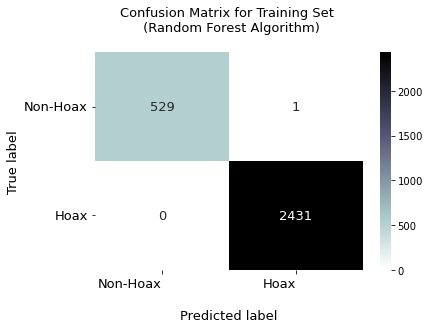

In [629]:
# predict
train_pred_rf = rf_model.predict(X_train)

# print classification report
print('Classification Report for Training Set (Random Forest Algorithm): \n')
print(classification_report(y_train, train_pred_rf))

# plot confusion matrix
confusion_matrix_rf = pd.DataFrame((confusion_matrix(y_train, train_pred_rf)), ('Non-Hoax', 'Hoax'), ('Non-Hoax', 'Hoax'))

plt.figure()
heatmap = sns.heatmap(confusion_matrix_rf, annot=True, annot_kws={'size': 13}, fmt='d', cmap='bone_r')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=13)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=13)

plt.title('Confusion Matrix for Training Set \n (Random Forest Algorithm)\n', fontsize=13, color='black')
plt.ylabel('True label', fontsize=13)
plt.xlabel('\nPredicted label', fontsize=13)
plt.show()

##### Performance of Testing Set

Classification Report for Testing Set (Random Forest Algorithm): 

              precision    recall  f1-score   support

           0       0.69      0.09      0.16       236
           1       0.83      0.99      0.90      1034

    accuracy                           0.82      1270
   macro avg       0.76      0.54      0.53      1270
weighted avg       0.80      0.82      0.76      1270



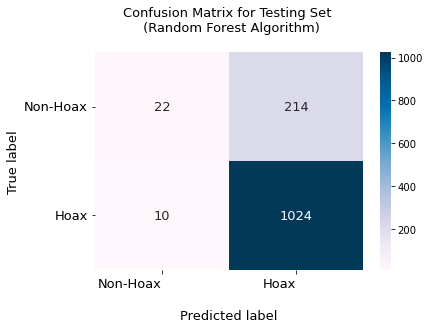

In [630]:
# predict
test_pred_rf = rf_model.predict(X_test)

# print classification report
print('Classification Report for Testing Set (Random Forest Algorithm): \n')
print(classification_report(y_test, test_pred_rf))

# Form confusion matrix as a DataFrame
confusion_matrix_rf = pd.DataFrame((confusion_matrix(y_test, test_pred_rf)), ('Non-Hoax', 'Hoax'), ('Non-Hoax', 'Hoax'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_rf, annot=True, annot_kws={'size': 13}, fmt='d', cmap='PuBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=13)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=13)

plt.title('Confusion Matrix for Testing Set \n (Random Forest Algorithm)\n', fontsize=13, color='black')
plt.ylabel('True label', fontsize=13)
plt.xlabel('\nPredicted label', fontsize=13)
plt.show()

In [631]:
f1_rf_model_train = round(f1_score(y_train, train_pred_rf)*100,2)
f1_rf_model_test = round(f1_score(y_test, test_pred_rf)*100,2)
print("F1-score on Training Set: {} %".format(f1_rf_model_train))
print("F1-score on Testing Set: {} %".format(f1_rf_model_test))

F1-score on Training Set: 99.98 %
F1-score on Testing Set: 90.14 %


#### 4. Naive Bayes Algorithm

In [632]:
from sklearn.naive_bayes import MultinomialNB

nb_model = MultinomialNB().fit(X_train, y_train)

#### Performance of Training Set

Classification Report for Training Set (Naive Bayes Algorithm):

              precision    recall  f1-score   support

           0       1.00      0.02      0.04       530
           1       0.82      1.00      0.90      2431

    accuracy                           0.82      2961
   macro avg       0.91      0.51      0.47      2961
weighted avg       0.86      0.82      0.75      2961



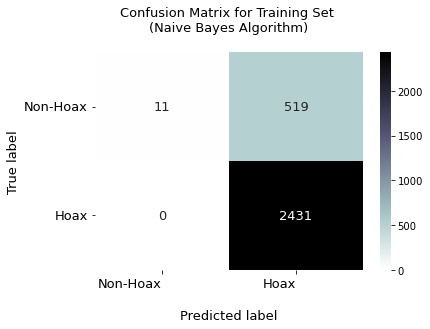

In [633]:
# predict
train_pred_nb = nb_model.predict(X_train)

# print classification report
print('Classification Report for Training Set (Naive Bayes Algorithm):\n')
print(classification_report(y_train, train_pred_nb))

# plot confusion matrix
confusion_matrix_nb = pd.DataFrame((confusion_matrix(y_train, train_pred_nb)), ('Non-Hoax', 'Hoax'), ('Non-Hoax', 'Hoax'))

plt.figure()
heatmap = sns.heatmap(confusion_matrix_nb, annot=True, annot_kws={'size': 13}, fmt='d', cmap='bone_r')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=13)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=13)

plt.title('Confusion Matrix for Training Set \n(Naive Bayes Algorithm)\n', fontsize=13, color='black')
plt.ylabel('True label', fontsize=13)
plt.xlabel('\nPredicted label', fontsize=13)
plt.show()

#### Performance of Testing Set

Classification Report for Testing Set (Naive Bayes Algorithm):

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       236
           1       0.81      1.00      0.90      1034

    accuracy                           0.81      1270
   macro avg       0.41      0.50      0.45      1270
weighted avg       0.66      0.81      0.73      1270



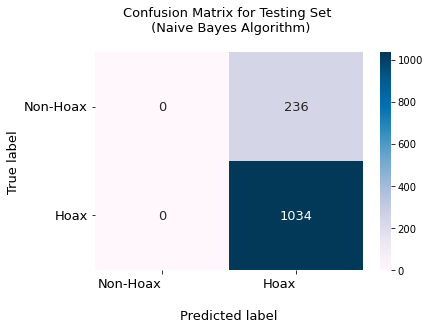

In [634]:
# predict
test_pred_nb = nb_model.predict(X_test)

# print classification report
print('Classification Report for Testing Set (Naive Bayes Algorithm):\n')
print(classification_report(y_test, test_pred_nb))

# plot confusion matrix
confusion_matrix_nb = pd.DataFrame((confusion_matrix(y_test, test_pred_nb)), ('Non-Hoax', 'Hoax'), ('Non-Hoax', 'Hoax'))

plt.figure()
heatmap = sns.heatmap(confusion_matrix_nb, annot=True, annot_kws={'size': 13}, fmt='d', cmap='PuBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=13)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=13)

plt.title('Confusion Matrix for Testing Set \n (Naive Bayes Algorithm)\n', fontsize=13, color='black')
plt.ylabel('True label', fontsize=13)
plt.xlabel('\nPredicted label', fontsize=13)
plt.show()

In [635]:
f1_nb_model_train = round(f1_score(y_train, train_pred_nb)*100,2)
f1_nb_model_test = round(f1_score(y_test, test_pred_nb)*100,2)
print("F1-score on Training Set: {} %".format(f1_nb_model_train))
print("F1-score on Testing Set: {} %".format(f1_nb_model_test))

F1-score on Training Set: 90.35 %
F1-score on Testing Set: 89.76 %


#### 5. MLP Classifier (Neural Network) Algorithm

In [636]:
from sklearn.neural_network import MLPClassifier

nn_model = MLPClassifier().fit(X_train, y_train)

#### Performance of Training Set

Classification Report for Training Set (MLP Classifier Algorithm): 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       530
           1       1.00      1.00      1.00      2431

    accuracy                           1.00      2961
   macro avg       1.00      1.00      1.00      2961
weighted avg       1.00      1.00      1.00      2961



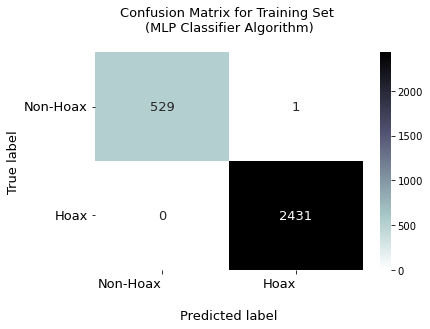

In [637]:
# predict
train_pred_nn = nn_model.predict(X_train)

# print classification report
print('Classification Report for Training Set (MLP Classifier Algorithm): \n')
print(classification_report(y_train, train_pred_nn))

# plot confusion matrix
confusion_matrix_nn = pd.DataFrame((confusion_matrix(y_train, train_pred_nn)), ('Non-Hoax', 'Hoax'), ('Non-Hoax', 'Hoax'))

plt.figure()
heatmap = sns.heatmap(confusion_matrix_nn, annot=True, annot_kws={'size': 13}, fmt='d', cmap='bone_r')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=13)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=13)

plt.title('Confusion Matrix for Training Set \n(MLP Classifier Algorithm)\n', fontsize=13, color='black')
plt.ylabel('True label', fontsize=13)
plt.xlabel('\nPredicted label', fontsize=13)
plt.show()

#### Performance of Testing Set

Classification Report for Testing Set (MLP Classifier Algorithm): 

              precision    recall  f1-score   support

           0       0.45      0.27      0.34       236
           1       0.85      0.93      0.88      1034

    accuracy                           0.80      1270
   macro avg       0.65      0.60      0.61      1270
weighted avg       0.77      0.80      0.78      1270



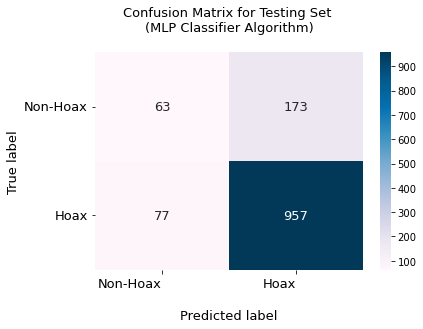

In [638]:
# predict
test_pred_nn = nn_model.predict(X_test)

# print classification report
print('Classification Report for Testing Set (MLP Classifier Algorithm): \n')
print(classification_report(y_test, test_pred_nn))

# plot confusion matrix
confusion_matrix_nn = pd.DataFrame((confusion_matrix(y_test, test_pred_nn)), ('Non-Hoax', 'Hoax'), ('Non-Hoax', 'Hoax'))

plt.figure()
heatmap = sns.heatmap(confusion_matrix_nn, annot=True, annot_kws={'size': 13}, fmt='d', cmap='PuBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=13)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=13)

plt.title('Confusion Matrix for Testing Set \n(MLP Classifier Algorithm)\n', fontsize=13, color='black')
plt.ylabel('True label', fontsize=13)
plt.xlabel('\nPredicted label', fontsize=13)
plt.show()

In [639]:
f1_nn_model_train = round(f1_score(y_train, train_pred_nn)*100,2)
f1_nn_model_test = round(f1_score(y_test, test_pred_nn)*100,2)
print("F1-score on Training Set: {} %".format(f1_nn_model_train))
print("F1-score on Testing Set: {} %".format(f1_nn_model_test))

F1-score on Training Set: 99.98 %
F1-score on Testing Set: 88.45 %


#### 6. K-Nearest Neighbor Algorithm

In [640]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier().fit(X_train, y_train)

#### Performance of Training Set

Classification Report for Training Set (K-Nearest Neighbor Algorithm): 

              precision    recall  f1-score   support

           0       0.73      0.25      0.37       530
           1       0.86      0.98      0.91      2431

    accuracy                           0.85      2961
   macro avg       0.80      0.62      0.64      2961
weighted avg       0.84      0.85      0.82      2961



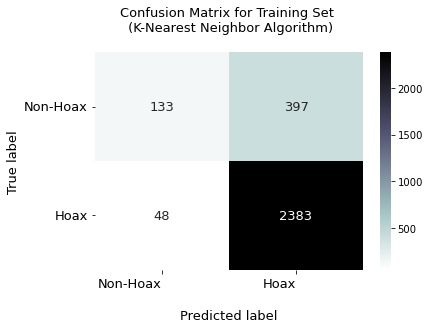

In [641]:
from sklearn.metrics import confusion_matrix, classification_report

# predict
train_pred_knn = knn_model.predict(X_train)

# print classification report
print('Classification Report for Training Set (K-Nearest Neighbor Algorithm): \n')
print(classification_report(y_train, train_pred_knn))

# plot confusion matrix
confusion_matrix_knn = pd.DataFrame((confusion_matrix(y_train, train_pred_knn)), ('Non-Hoax', 'Hoax'), ('Non-Hoax', 'Hoax'))

plt.figure()
heatmap = sns.heatmap(confusion_matrix_knn, annot=True, annot_kws={'size': 13}, fmt='d', cmap='bone_r')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=13)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=13)

plt.title('Confusion Matrix for Training Set \n (K-Nearest Neighbor Algorithm)\n', fontsize=13, color='black')
plt.ylabel('True label', fontsize=13)
plt.xlabel('\nPredicted label', fontsize=13)
plt.show()

#### Performance of Testing Set

Classification Report for Testing Set (K-Nearest Neighbor Algorithm): 

              precision    recall  f1-score   support

           0       0.41      0.13      0.19       236
           1       0.83      0.96      0.89      1034

    accuracy                           0.80      1270
   macro avg       0.62      0.54      0.54      1270
weighted avg       0.75      0.80      0.76      1270



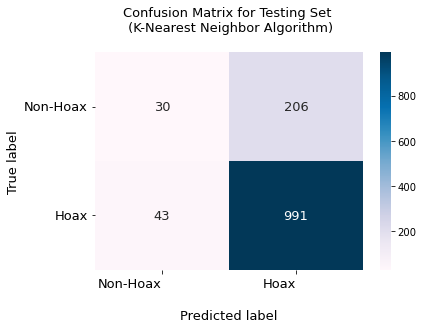

In [642]:
# predict
test_pred_knn = knn_model.predict(X_test)

# print classification report
print('Classification Report for Testing Set (K-Nearest Neighbor Algorithm): \n')
print(classification_report(y_test, test_pred_knn))

# plot confusion matrix
confusion_matrix_knn = pd.DataFrame((confusion_matrix(y_test, test_pred_knn)), ('Non-Hoax', 'Hoax'), ('Non-Hoax', 'Hoax'))

plt.figure()
heatmap = sns.heatmap(confusion_matrix_knn, annot=True, annot_kws={'size': 13}, fmt='d', cmap='PuBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=13)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=13)

plt.title('Confusion Matrix for Testing Set \n (K-Nearest Neighbor Algorithm)\n', fontsize=13, color='black')
plt.ylabel('True label', fontsize=13)
plt.xlabel('\nPredicted label', fontsize=13)
plt.show()

In [643]:
f1_knn_model_train = round(f1_score(y_train, train_pred_knn)*100,2)
f1_knn_model_test = round(f1_score(y_test, test_pred_knn)*100,2)
print("F1-score on Training Set: {} %".format(f1_knn_model_train))
print("F1-score on Testing Set: {} %".format(f1_knn_model_test))

F1-score on Training Set: 91.46 %
F1-score on Testing Set: 88.84 %


#### 7. Support Vector Machine

In [644]:
from sklearn.svm import SVC

svc_model = SVC().fit(X_train, y_train)

#### Performance of Training Set

Classification Report for Testing Set (Support Vector Machine Algorithm): 

              precision    recall  f1-score   support

           0       1.00      0.72      0.84       530
           1       0.94      1.00      0.97      2431

    accuracy                           0.95      2961
   macro avg       0.97      0.86      0.90      2961
weighted avg       0.95      0.95      0.95      2961



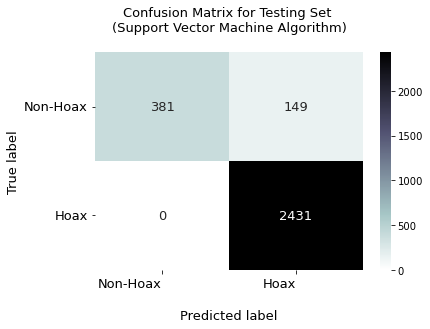

In [645]:
# predict
train_pred_svc = svc_model.predict(X_train)

# print classification report
print('Classification Report for Testing Set (Support Vector Machine Algorithm): \n')
print(classification_report(y_train, train_pred_svc))

# plot confusion matrix
confusion_matrix_svc = pd.DataFrame((confusion_matrix(y_train, train_pred_svc)), ('Non-Hoax', 'Hoax'), ('Non-Hoax', 'Hoax'))

plt.figure()
heatmap = sns.heatmap(confusion_matrix_svc, annot=True, annot_kws={'size': 13}, fmt='d', cmap='bone_r')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=13)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=13)

plt.title('Confusion Matrix for Testing Set \n(Support Vector Machine Algorithm)\n', fontsize=13, color='black')
plt.ylabel('True label', fontsize=13)
plt.xlabel('\nPredicted label', fontsize=13)
plt.show()

#### Performance of Testing Set

Classification Report for Testing Set (Support Vector Machine Algorithm): 

              precision    recall  f1-score   support

           0       0.79      0.05      0.09       236
           1       0.82      1.00      0.90      1034

    accuracy                           0.82      1270
   macro avg       0.80      0.52      0.49      1270
weighted avg       0.81      0.82      0.75      1270



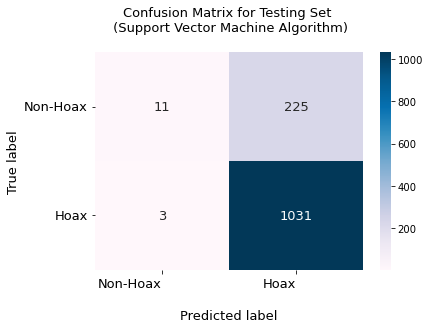

In [646]:
from sklearn.metrics import confusion_matrix, classification_report

# predict
test_pred_svc = svc_model.predict(X_test)

# print classification report
print('Classification Report for Testing Set (Support Vector Machine Algorithm): \n')
print(classification_report(y_test, test_pred_svc))

# plot confusion matrix
confusion_matrix_svc = pd.DataFrame((confusion_matrix(y_test, test_pred_svc)), ('Non-Hoax', 'Hoax'), ('Non-Hoax', 'Hoax'))

plt.figure()
heatmap = sns.heatmap(confusion_matrix_svc, annot=True, annot_kws={'size': 13}, fmt='d', cmap='PuBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=13)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=13)

plt.title('Confusion Matrix for Testing Set \n (Support Vector Machine Algorithm)\n', fontsize=13, color='black')
plt.ylabel('True label', fontsize=13)
plt.xlabel('\nPredicted label', fontsize=13)
plt.show()

In [647]:
f1_svc_model_train = round(f1_score(y_train, train_pred_svc)*100,2)
f1_svc_model_test = round(f1_score(y_test, test_pred_svc)*100,2)
print("F1-score on Training Set: {} %".format(f1_svc_model_train))
print("F1-score on Testing Set: {} %".format(f1_svc_model_test))

F1-score on Training Set: 97.03 %
F1-score on Testing Set: 90.04 %


### MODEL SELECTION

The results will be evaluated and compared by looking at the F1-score of each model. The F1-score is the metric that gives equal weight to both the Precision and Recall for measuring its performance in terms of accuracy, making it an alternative to Accuracy metrics. F1-score is a better metric when there are imbalanced classes as in this case.

The following is the accuracy value of each model.

In [648]:
results = pd.DataFrame([["Logistic Regression", f1_log_model_train, f1_log_model_test], ["Decision Tree", f1_dt_model_train, f1_dt_model_test],
                        ["Random Forest", f1_rf_model_train, f1_rf_model_test], ["Naive Bayes", f1_nb_model_train, f1_nb_model_test],
                        ["K-Nearest Neighbor", f1_knn_model_train, f1_knn_model_test], ["MLP Classifier", f1_nn_model_train, f1_nn_model_test],
                        ["Support Vector Machine", f1_svc_model_train, f1_svc_model_test]],
                        columns = ["Models", "Training F1-Score", "Testing F1-Score"])

results["% Difference"] = results["Training F1-Score"] - results["Testing F1-Score"]

results.sort_values(by=['% Difference'], ascending=True).style.background_gradient(cmap='Blues')

,Models,Training F1-Score,Testing F1-Score,% Difference
3,Naive Bayes,90.350000,89.760000,0.590000
0,Logistic Regression,90.740000,89.860000,0.880000
4,K-Nearest Neighbor,91.460000,88.840000,2.620000
6,Support Vector Machine,97.030000,90.040000,6.990000
2,Random Forest,99.980000,90.140000,9.840000
5,MLP Classifier,99.980000,88.450000,11.530000
1,Decision Tree,99.980000,85.620000,14.360000


A good model is a model that can provide good performance in the train and test datasets.

- **Over-Fitting**: Good performance on the train data, poor generalization to other data.
- **Under-Fitting** : Poor performance on the train data and poor generalization to other data
- **Appropriate-Fitting** : Good performance on the train data, good generalization to other data.

**Conclusion**: Based on the table above, it's concluded that the **best model** to predict the truth of the articles is the **Logistic Regression Model**. It is because this model tends to be able to predict data well in training and testing sets. On the other hand, other algorithms tend to overfit their performance.

### PREDICTION

#### Import Dataset

In [649]:
df_test = pd.read_csv('Satria Data - Data Uji.csv', sep=',')
print('This dataset has %d rows dan %d columns.\n' % df_test.shape)
df_test.head()

This dataset has 470 rows dan 5 columns.



,ID,tanggal,judul,narasi,nama file gambar
0,238057,13-Jul-20,Narasi Tito Karnavian Berideologi Komunis Kare...,TITO KARNIVAN ITU BERIDIOLOGI KOMUNIS DIA BISA...,238057.jpg
1,238158,6-Jul-20,Anies: Seberat beratnya Pekerjaan Akan terasa ...,Seberat beratnya Pekerjaan Akan terasa ringan ...,238158.jpg
2,238865,22-Apr-20,Hindu di india Melemparkan Patung Buatan Merek...,Hindu di india melemparkan patung buatan merek...,238865.jpg
3,248298,22-Oct-19,RSCM Praktekkan Penyedotan Plug Vena/Saluran ...,Mulai Hari ini di RSCM mulai diPraktekkan Peny...,248298.jpg
4,255176,1-May-20,Permohonan Kelonggaran Angsuran ke OJK,"Untuk sekedar info, Bagi anda yg punya ansuran...",255176.jpg


#### Data Cleaning

In [650]:
# data types information of train dataset
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470 entries, 0 to 469
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                470 non-null    int64 
 1   tanggal           470 non-null    object
 2   judul             470 non-null    object
 3   narasi            470 non-null    object
 4   nama file gambar  470 non-null    object
dtypes: int64(1), object(4)
memory usage: 18.5+ KB


In [651]:
# missing values in test data
print('Missing values status:', df_test.isnull().values.any())
print('\nThe number of missing values for each columns:')
print(df_test.isnull().sum().sort_values(ascending=False))

Missing values status: False

The number of missing values for each columns:
ID                  0
tanggal             0
judul               0
narasi              0
nama file gambar    0
dtype: int64


In [652]:
# columns in test dataset
df_test.columns

Index(['ID', 'tanggal', 'judul', 'narasi', 'nama file gambar'], dtype='object')

In [653]:
# text cleaning
df_test['narasi'] = df_test['narasi'].str.lower() #lower case
df_test['narasi'] = df_test['narasi'].str.replace('[^\w\s#@/:%.,_-]', '', flags=re.UNICODE) #emoji
df_test['narasi'] = df_test['narasi'].str.replace('\d+', '') #remove number
df_test['narasi'] = df_test['narasi'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ' , x)) #remove punctuation
df_test['narasi'] = df_test['narasi'].apply(lambda x: contractions.fix(x)) #contractions
df_test['narasi'] = df_test['narasi'].str.replace(r'(\w)\1{2,}', r'\1') #repeated char
df_test['narasi'] = df_test['narasi'].str.replace('[‘’“”…]', '')
df_test['narasi'] = df_test['narasi'].str.replace('\w*\d\w*', '') #remove word containing number
df_test['narasi'] = df_test['narasi'].str.replace('(<.*?>)', '') #remove html markup
df_test['narasi'] = df_test['narasi'].str.replace('https?://\S+|www\.\S+', '') #remove url
df_test['narasi'] = df_test['narasi'].replace(to_replace=r'^https?:\/\/.*[\r\n]*',value='',regex=True) #remove html
df_test['narasi'] = df_test['narasi'].str.replace(' +', ' ') #remove extra space

In [654]:
df_test['narasi']= df_test.apply(lambda row: nltk.word_tokenize(row['narasi']), axis=1) #tokenization
df_test['narasi'] = df_test['narasi'].apply(remove_stopword_ind) #remove stop word ind
df_test['narasi'] = df_test['narasi'].apply(remove_stopword) #remove stop word eng
df_test['narasi'] = df_test['narasi'].apply(lematization) #lemmatization

#### Data Modeling

In [655]:
# vectorization
test_vectors = vectorization.transform(df_test['narasi'])

In [656]:
# prediction using best predictive models (naive bayes)
predict = pd.Series(log_model.predict(test_vectors), name = "label")
pred_results = pd.concat([df_test['ID'], predict], axis = 1)
pred_results.to_csv("predict hoax articles.csv", index = False)
pred_results.head()

,ID,label
0,238057,1
1,238158,1
2,238865,1
3,248298,1
4,255176,1


In [657]:
decode_map = {0: "Non Hoax", 1: "Hoax"}
def decode_sentiment(label):
    return decode_map[int(label)]

pred_results['label'] = pred_results['label'].apply(lambda x: decode_sentiment(x))

In [658]:
temp = pred_results.groupby('label').count()['ID'].sort_values(ascending=False)
temp.reset_index()

,label,ID
0,Hoax,468
1,Non Hoax,2


In [659]:
# visualization
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=1, cols=2, specs=[[{"type": "bar"}, {"type": "domain"}]])

fig.add_trace(
    go.Bar(x=temp.index, y=temp.values, marker=
           dict(color=["#D62728", "#00CC96"]), showlegend=False),
    row=1, col=1
)

fig.add_trace(
    go.Pie(labels=temp.index, values=temp.values, marker_colors=["#D62728", "#00CC96"]),
           row=1, col=2
)

fig.update_layout(height=600, width=800, title_text="Percentage of Hoax and Non-Hoax Articles")
fig.show()

<div style="text-align: right"> By: Fitria Dwi Wulandari </div>
<div style="text-align: right">Last updated on Oct 2022 </div>